# 4.10 Coding Etiquette & Excel Reporting Part 1

## Table of Contents:

### 1. Importing Libraries and Data
### 2. PII Concerns
### 3. Spending habits between the different U.S. regions.
### 4. Create an exclusion flag for low-activity customers
### 5. Exclude low-activity customers from the data
### 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
### 7. Create an appropriate visualization to show the distribution of profiles.
### 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 9. Compare your customer profiles with regions and departments. Can you identify a link between them?
### 10. Exporting Data

## 1. Importing Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
path=r'/Users/isabelgonzalez/Desktop/achievement 4'

In [10]:
df=pd.read_pickle(os.path.join(path, 'data', 'prepared data', 'full_instacart_data.pkl'))

In [11]:
df_departments = pd.read_csv(os.path.join(path,'data', 'prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. PII Concerns

In [12]:
# looking for PII columns 
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'one_time_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'Busiest_day',
       'price_range', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_order', 'avg_spent', 'mean_price_for_orders',
       'spending_flag', 'median_of_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [13]:
df.shape

(32404859, 36)

In [14]:
#drop first_name and last_name for customer privacy, and _merge for saving space
df2 = df.drop(columns = ['first_name', 'last_name', '_merge'])

## 3. Spending habits between the different U.S. regions.

In [15]:
# creating region with all appropriate states
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
          'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
          'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
         'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
        'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
#loop for region column
result=[]

for value in df2['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    else:
        result.append('West')

In [17]:
#including column in dataset
df2['region'] = result

In [18]:
#checking values
df2['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [19]:
# spending habits between the different U.S. regions
df2.groupby('region').agg({'prices': ['sum']})

,prices
,sum
region,
Midwest,59192977.7
Northeast,44530105.8
South,84107910.4
West,64595126.7


The south spends the most and the northeast spends the least.

In [20]:
# cross checking region and spending_flag columns
crosstab = pd.crosstab(df2['region'], df2['spending_flag'], dropna = False)

In [21]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## 4. Create an exclusion flag for low-activity customers

In [22]:
# creating execution flag for low activity customers
df2.loc[df2['max_order'] < 5, 'exclusion_flag'] = 'Low Activity Customer'

In [23]:
# creating execution flag for regular customers
df2.loc[df2['max_order'] >= 5, 'exclusion_flag'] = 'Regular Customer'

In [24]:
# checking values
df2['exclusion_flag'].value_counts(dropna=False)

Regular Customer         30964564
Low Activity Customer     1440295
Name: exclusion_flag, dtype: int64

## 5. Exclude low-activity customers from the data

In [25]:
#excluding low-activity customers
df_low_act = df2[df2['exclusion_flag']== 'Low Activity Customer']

In [26]:
# checking to see if the values match up
df_low_act.shape

(1440295, 35)

In [27]:
# checking to see if the values match up
df_low_act['exclusion_flag'].value_counts(dropna=False)

Low Activity Customer    1440295
Name: exclusion_flag, dtype: int64

In [28]:
#excluding regular customers
df_reg_cust = df2[df2['exclusion_flag']== 'Regular Customer'].copy()

In [29]:
# checking to see if the values match up
df_reg_cust.shape

(30964564, 35)

In [30]:
# checking to see if the values match up
df_reg_cust['exclusion_flag'].value_counts(dropna=False)

Regular Customer    30964564
Name: exclusion_flag, dtype: int64

In [31]:
# exporting dfs
df_low_act.to_pickle(os.path.join(path, 'data','prepared Data', '4.10_low_activity_customers_sample.pkl'))
df_reg_cust.to_pickle(os.path.join(path, 'data','prepared Data', '4.10_reg_customers_sample.pkl'))

In [32]:
df3 = df_reg_cust

## 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

### Age

In [33]:
# creating profiling variables for the age column
# Young Adult ranges from 18-24
df3.loc[(df3['age'] >18) & (df3['age'] <= 24), 'age_group'] = 'Young Adult'

In [34]:
# Adult ranges from 24-64
df3.loc[(df3['age'] > 24) & (df3['age'] <=64), 'age_group'] = 'Adult'

In [35]:
# Senior ranges from 65 and above
df3.loc[df3['age'] >=65, 'age_group'] = 'Senior'

In [36]:
# checking counts
df3['age_group'].value_counts()

Adult          19353826
Senior          8195544
Young Adult     2936737
Name: age_group, dtype: int64

### Income

In [56]:
# creating profiling variables for the Income column
#Low income ranges from 0-53,000
df3.loc[df3['income'] < 53000, 'income_class'] = 'Low Income'

In [57]:
#Middle income ranges from 53,000-110000
df3.loc[(df3['income'] >= 53000) & (df3['income'] < 110000), 'income_class'] = 'Middle Income'

In [58]:
#High income ranges from 110000 and above
df3.loc[df3['income'] >= 110000, 'income_class'] = 'High Income'

In [59]:
# checking counts
df3['income_class'].value_counts()

Middle Income    15485073
High Income      11570460
Low Income        3909031
Name: income_class, dtype: int64

### Dependants

In [33]:
# creating profiling variables for the Income column
df3.loc[df3['no_of_dependants'] == 0, 'dependant_flag'] = 'No dependants'

In [34]:
#customers with more than 0 dependents are parents
df3.loc[df3['no_of_dependants'] > 0, 'dependant_flag'] = 'Parent'

In [35]:
# checking values
df3['dependant_flag'].value_counts()

Parent           23224883
No dependants     7739681
Name: dependant_flag, dtype: int64

### Department_id

In [36]:
#merging department df
df4 = df3.merge(df_departments, how = 'inner', left_on='department_id', right_index=True) 

In [37]:
print(df4['department'].unique())

['pets' 'household' 'deli' 'babies' 'alcohol' 'canned goods' 'breakfast'
 'produce' 'other' 'bulk' 'dairy eggs' 'meat seafood' 'pantry' 'missing'
 'beverages' 'international' 'dry goods pasta' 'snacks' 'bakery'
 'personal care']


In [38]:
# identify all the products purchased from the pet department
df4['pets'] = ['pet owner' if x == 'pets' else 'no pets' for x in df4['department']]

In [39]:
# check values
df4['pets'].value_counts()

no pets      28327895
pet owner     2571901
Name: pets, dtype: int64

In [40]:
# identify all the products purchased from the baby department
df4['baby'] = ['parent' if x == 'babies' else 'not a parent' for x in df4['department']]

In [41]:
# check values
df4['baby'].value_counts()

not a parent    30199939
parent            699857
Name: baby, dtype: int64

In [42]:
# make sure rows adds up
df4.shape

(30899796, 42)

## 7. Create an appropriate visualization to show the distribution of profiles.

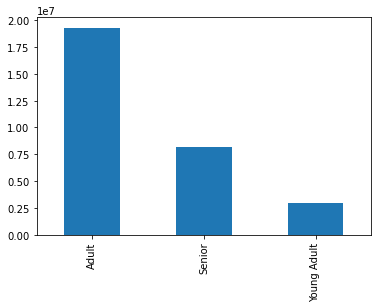

In [43]:
# bar chart for age groups
age_bar=df4['age_group'].value_counts().plot.bar()

In [60]:
# bar chart for income class
income_bar=df4['income_class'].value_counts().plot.bar()

NameError: name 'df4' is not defined

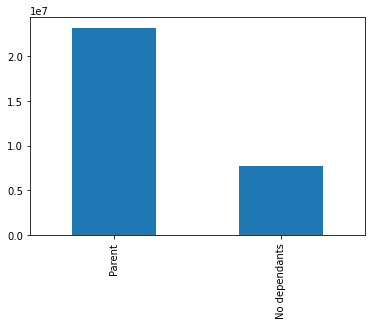

In [45]:
# bar chart for dependants
dependant_bar=df4['dependant_flag'].value_counts().plot.bar()

## 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [46]:
#aggregating for regional expenditure
df4.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.786218  1.0  25.0
Senior       7.794875  1.0  25.0
Young Adult  7.785975  1.0  25.0

In [47]:
#aggregating for order frequency
df4.groupby('age_group').agg({'median_of_days_since_prior_order': ['mean', 'min', 'max']})

median_of_days_since_prior_order           
                                        mean  min   max
age_group                                              
Adult                               9.977385  0.0  30.0
Senior                              9.934696  0.0  30.0
Young Adult                         9.872464  0.0  30.0

## 9. Compare your customer profiles with regions and departments. Can you identify a link between them?

In [48]:
# cross checking regions and loyal customers
crosstab_region_loyalty = pd.crosstab(df4['region'], df4['loyalty_flag'], dropna = False)

In [49]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2369496,1133757,3742697
Northeast,1838359,840015,2774799
South,3399840,1589290,5300222
West,2658048,1227920,4025353


In [50]:
# cross checking if the most loyal customers have less days since prior order
cross_median_loyalty = df4.groupby('loyalty_flag').agg({'median_of_days_since_prior_order':['mean']})
cross_median_loyalty

,median_of_days_since_prior_order
,mean
loyalty_flag,
Loyal customer,5.170693
New customer,18.048421
Regular customer,10.615556


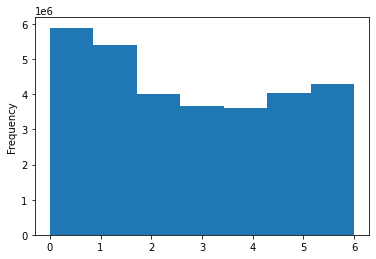

In [51]:
# histogram of days of week, days are 0-6 which are Sat-Fri
hist_dow = df4['orders_day_of_week'].plot.hist(bins=7)

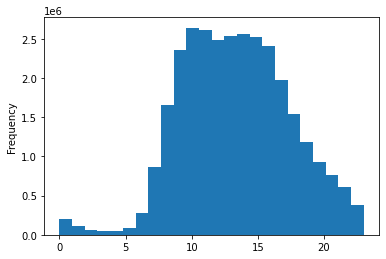

In [52]:
hist_hod = df4['order_hour_of_day'].plot.hist(bins=24)

In [53]:
cross_loyalty_dow = df4.groupby('orders_day_of_week').agg({'prices':['mean']})
cross_loyalty_dow

,prices
,mean
orders_day_of_week,
0,7.855838
1,7.756031
2,7.752872
3,7.755441
4,7.755060
5,7.759508
6,7.855839


In [54]:
# cross checking age groups and pet owners
crosstab_age_pets = pd.crosstab(df4['pets'], df4['age_group'], dropna = False)

In [55]:
crosstab_age_pets

age_group,Adult,Senior,Young Adult
pets,,,
no pets,17704787,7494609,2689266
pet owner,1608625,684020,241114


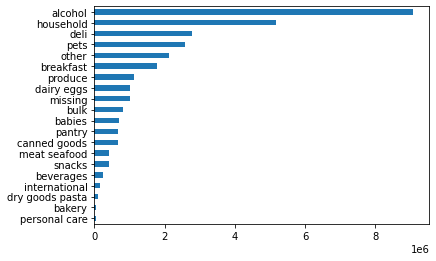

In [56]:
department_bar=df4['department'].value_counts().sort_values().plot.barh()

## 10. Exporting Data

In [57]:
age_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_age_bar.png'))

In [58]:
income_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_income_bar.png'))

In [59]:
dependant_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_dependant_bar.png'))

In [60]:
hist_dow.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_dow_hist.png'))

In [61]:
hist_hod.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_hod_hist.png'))

In [62]:
department_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_department_bar.png'))

In [63]:
df4.to_pickle(os.path.join(path, 'data','prepared Data', '4.10_final_combined_data.pkl'))